In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
img_path = 'data/Challenge Problems C/Challenge Problem C-03'

# Visualize image

## Problem images

all images = ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', 'A.png', 'B.png', 'C.png', 'D.png', 'E.png', 'F.png', 'G.png', 'H.png']
problem images = ['A.png', 'B.png', 'C.png', 'D.png', 'E.png', 'F.png', 'G.png', 'H.png']


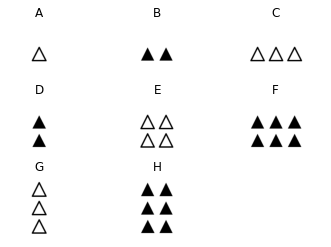

In [3]:


img_list = sorted([i for i in os.listdir(img_path) if i.endswith('png')])
print(f"all images = {img_list}")
f, ax = plt.subplots(3, 3)
problem_list = img_list[-8:]
print(f"problem images = {problem_list}")
for i in range(3):
    for j in range(3):
        ax[i][j].axis('off')
        if i*3+j == 8:
            break
        c_img = cv2.imread(os.path.join(img_path, problem_list[i*3+j]))
        ax[i][j].imshow(c_img)
        ax[i][j].set_title(problem_list[i*3+j].split('.')[0])


## Answer images

answer images = ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png']


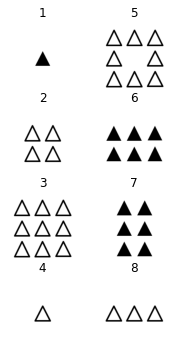

In [4]:
print(f"answer images = {img_list[:8]}")
f, ax = plt.subplots(4, 2, figsize=(3, 6))
for j in range(2):
    for i in range(4):
        ax[i][j].axis('off')
        c_img = cv2.imread(os.path.join(img_path, img_list[j*4+i]))
        ax[i][j].imshow(c_img)
        ax[i][j].set_title(img_list[j*4+i].split('.')[0])

In [8]:
c_img[92, 0:100, 0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       112,   0,   0,   0,  24, 247, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,  80,   0,   0,   0,  48, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 112,   0,   0,   0,  24, 247, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255,  80], dtype=uint8)

# Concept: Contours
What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

        For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
        findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
        In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

# Codes

## Contour dections

top-left 10x10 area = [[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
number of shapes = 2
color of shape 0 is 0.0
color of shape 1 is 0.0
centroid loc x, y = 117, 98
centroid loc x, y = 64, 98


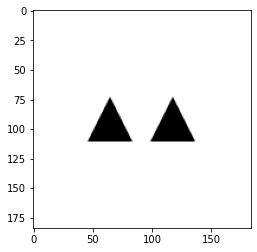

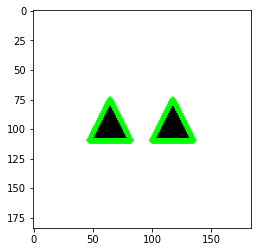

In [155]:
img = cv2.imread(os.path.join(img_path, problem_list[1]))
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"top-left 10x10 area = {gray[:10, :10]}")
#get contours
thre = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)[1]
cnts, hier = cv2.findContours(thre.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
print(f"number of shapes = {len(cnts)}")
cont = cv2.drawContours(img.copy(), cnts, -1, (0,255,0), 3)
plt.imshow(cont)
#get inner color of each counter
for i in range(len(cnts)):
    mask = np.zeros(img.shape,np.uint8)
    mask = cv2.drawContours(mask,cnts,i,(255, 255, 255),-1)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray,mask = mask[:, :, 0])
    print(f"color of shape {i} is {max_val}")
#get contour location
for i in range(len(cnts)):
    M = cv2.moments(cnts[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"centroid loc x, y = {cx}, {cy}")

top-left 10x10 area = [[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
number of shapes = 3
color of shape 0 is 255.0
color of shape 1 is 255.0
color of shape 2 is 255.0
centroid loc x, y = 145, 97
centroid loc x, y = 91, 97
centroid loc x, y = 38, 97


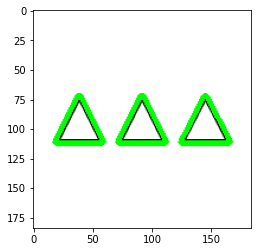

In [158]:
img = cv2.imread(os.path.join(img_path, problem_list[2]))
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"top-left 10x10 area = {gray[:10, :10]}")
#get contours
thre = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)[1]
cnts, hier = cv2.findContours(thre.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
print(f"number of shapes = {len(cnts)}")
cont = cv2.drawContours(img.copy(), cnts, -1, (0,255,0), 3)
plt.imshow(cont)
#get inner color of each counter
for i in range(len(cnts)):
    mask = np.zeros(img.shape,np.uint8)
    mask = cv2.drawContours(mask,cnts,i,(255, 255, 255),-1)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray,mask = mask[:, :, 0])
    print(f"color of shape {i} is {max_val}")
#get contour location
for i in range(len(cnts)):
    M = cv2.moments(cnts[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"centroid loc x, y = {cx}, {cy}")

## shape detection from contour

top-left 10x10 area = [[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
contour 0 is triangle
contour 1 is triangle
contour 2 is triangle


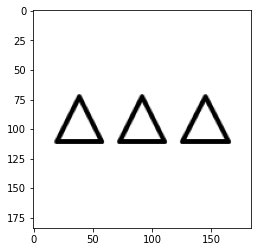

In [166]:
def detect(c):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) == 3:
        shape = 'triangle'
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    elif len(approx) == 5:
        shape = "pentagon"
    else:
        shape = "circle"
    return shape
img = cv2.imread(os.path.join(img_path, problem_list[2]))
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"top-left 10x10 area = {gray[:10, :10]}")
#get contours
thre = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)[1]
cnts, hier = cv2.findContours(thre.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(cnts):
    print(f"contour {i} is {detect(c)}")

## Connected-component algorithm implementation

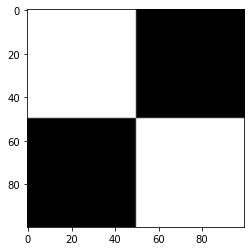

In [4]:
toy_example = np.zeros((100, 100))
toy_example[:50, :50] = 1
toy_example[50:, 50:] = 1
plt.imshow(toy_example, cmap='gray')

Suppose we consider a white area as a component; in this case we have two components. Connected-component algorithm 1)detect the number of componets and 2)detect the pixel locations of the two components

In [144]:
def detect_cc(img):
    used = np.zeros(img.shape)

    def cc_walker(i, j):
        if used[i, j]:
            return
        if img[i, j] == 0:
            return
        used[i, j] = 1
        locs.append((i, j))
        if i - 1 >= 0:
            cc_walker(i-1, j)
        if i + 1 < img.shape[0]:
            cc_walker(i+1, j)
        if j - 1 >= 0:
            cc_walker(i, j-1)
        if j + 1 < img.shape[1]:
            cc_walker(i, j+1)

    all_locs = []
    num_cc = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 1 and used[i, j] == 0:
                locs = []
                cc_walker(i, j)
                all_locs.append(locs)
                plt.figure()
                plt.imshow(used)
                num_cc += 1
    return num_cc, all_locs

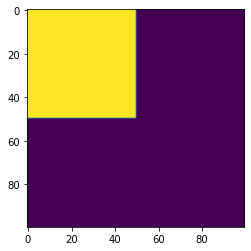

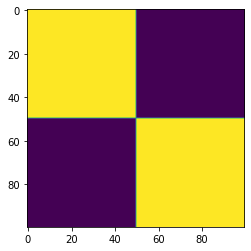

In [146]:
num_cc, all_locs = detect_cc(toy_example)